In [2]:
#Import dataset
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plimg
from PIL import Image
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb')as f:
        datadict = p.load(f,encoding='latin1')
        #print(datadict.keys())
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        Y = np.array(Y)
        return X, Y

X1,Y1=load_CIFAR_batch('data_batch_1')
X2,Y2=load_CIFAR_batch('data_batch_2')
X3,Y3=load_CIFAR_batch('data_batch_3')
X4,Y4=load_CIFAR_batch('data_batch_4')
X5,Y5=load_CIFAR_batch('data_batch_5')
X_test,Y_test=load_CIFAR_batch('test_batch')
X=np.vstack((X1,X2,X3,X4,X5)).reshape(50000,3072)
X=X/255
Y=np.hstack((Y1,Y2,Y3,Y4,Y5)).reshape((50000,1))
X_test=X_test/255
X_test=X_test.reshape(10000,3072)
from sklearn.preprocessing import OneHotEncoder
# convert the 10 classes to one hot encoding
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(Y.reshape(-1,1)).toarray()
y_test = one_hot.fit_transform(Y_test.reshape(-1,1)).toarray()
print(y_train.shape)

(50000, 10)


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#build one-hidden-layer network using relu activation function
network_model = Sequential()
network_model.add(Dense(1000, activation='relu'))
network_model.add(Dense(10, activation='softmax'))

# training and testing
network_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=network_model.fit(X,y_train,batch_size=100,epochs=100,validation_data=(X_test, y_test))



Epoch 1/100
500/500 [==============================] - 8s 15ms/step - loss: 1.9820 - accuracy: 0.3156 - val_loss: 1.7715 - val_accuracy: 0.3746
Epoch 2/100
500/500 [==============================] - 7s 15ms/step - loss: 1.7086 - accuracy: 0.3907 - val_loss: 1.6452 - val_accuracy: 0.4196
Epoch 3/100
500/500 [==============================] - 8s 17ms/step - loss: 1.6324 - accuracy: 0.4211 - val_loss: 1.6795 - val_accuracy: 0.3962
Epoch 4/100
500/500 [==============================] - 13s 26ms/step - loss: 1.5871 - accuracy: 0.4368 - val_loss: 1.5532 - val_accuracy: 0.4501
Epoch 5/100
500/500 [==============================] - 18s 36ms/step - loss: 1.5421 - accuracy: 0.4535 - val_loss: 1.5590 - val_accuracy: 0.4505
Epoch 6/100
500/500 [==============================] - 15s 30ms/step - loss: 1.5068 - accuracy: 0.4671 - val_loss: 1.5601 - val_accuracy: 0.4527
Epoch 7/100
500/500 [==============================] - 13s 25ms/step - loss: 1.4823 - accuracy: 0.4759 - val_loss: 1.5246 - val_accur

In [11]:
from sklearn.metrics import classification_report

# compute the accuracy and print a classification report
label_tra=network_model.predict(X)
label_test=network_model.predict(X_test)
label_name=['0','1','2','3','4','5','6','7','8','9']
pred_tra,pred_test=np.zeros(50000),np.zeros(10000)
for i in range(50000):
    pred_tra[i]=np.argmax(label_tra[i])
for j in range(10000):
    pred_test[j]=np.argmax(label_test[j])
print(classification_report(Y, pred_tra, target_names=label_name))
print(classification_report(Y_test, pred_test, target_names=label_name))
print('test error rate:',np.mean(pred_test!=Y_test))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68      5000
           1       0.78      0.86      0.82      5000
           2       0.65      0.45      0.53      5000
           3       0.64      0.37      0.47      5000
           4       0.55      0.69      0.61      5000
           5       0.59      0.58      0.59      5000
           6       0.67      0.82      0.74      5000
           7       0.80      0.76      0.78      5000
           8       0.91      0.60      0.72      5000
           9       0.76      0.80      0.78      5000

    accuracy                           0.68     50000
   macro avg       0.69      0.68      0.67     50000
weighted avg       0.69      0.68      0.67     50000

              precision    recall  f1-score   support

           0       0.47      0.71      0.56      1000
           1       0.58      0.64      0.61      1000
           2       0.44      0.30      0.35      1000
           3       0.38 

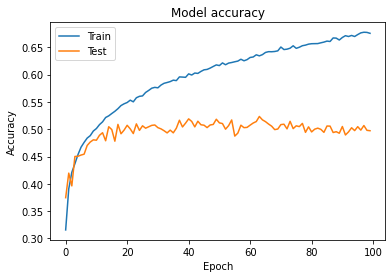

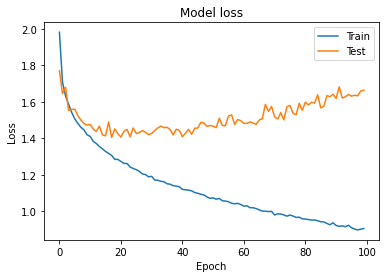

In [10]:
#plot training and test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()